In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from collections import Counter
# pd.options.mode.chained_assignment = None  # 경고 숨기기

In [2]:
# wordcloud에서 한글을 사용할 수 있도록 설정하기
font_path = 'C:\\Users\\user\\anaconda3\\envs\\kiwi\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'

In [3]:
# 전처리 완료된 데이터 불러오기
# from google.colab import files
# import pandas as pd

# uploaded = files.upload()

news = pd.read_csv('naver_01.Preprocessing_FIN.csv')

news.head()

,Date,Title,ppc_Title,Tokens
0,2023-06-01,"네이버, 금지·혐오 표현 기준 개정…12일부터 정책 적용",네이버 금지 혐오 표현 기준 개정 12일부터 정책 적용,"['네이버', '금지', '혐오', '표현', '기준', '개정', '정책', '적용']"
1,2023-06-01,"네이버, 초거대 AI로 소상공인 라이브커머스 대본 작성 돕는 이유",네이버 초거대 AI로 소상공인 라이브커머스 대본 작성 돕는 이유,"['네이버', '거대', '상공인', '라이브', '커머스', '대본', '작성',..."
2,2023-06-01,네이버 악성 댓글땐 ‘악플러 꼬리표’ 단다,네이버 악성 댓글땐 악플러 꼬리표 단다,"['네이버', '악성', '댓글', '때', '악플', '꼬리표']"
3,2023-06-01,네이버가 4달간 중소상공인 브랜드 구축 돕는다,네이버가 4달간 중소상공인 브랜드 구축 돕는다,"['네이버', '중소', '상공인', '브랜드', '구축']"
4,2023-06-01,네이버·카카오 인물정보에 '장례지도사' 등 5개 직업 추가,네이버 카카오 인물정보에 장례지도사 등 5개 직업 추가,"['네이버', '카카오', '인물', '정보', '장례', '지도사', '직업', ..."


WordCloud로 자주 등장하는 단어 확인

# 1. WordCloud

## (1) **[전체(긍+부정+Zero+NaN)]** WordCloud - "Token" 컬럼

In [4]:
# 각 데이터프레임의 토큰을 하나의 문자열로 변환
## 기존: news = ' '.join(news['Token'].apply(lambda x: ' '.join(x)))

## 수정
news_data = ''
for _, row in news.iterrows():
    news_data += row['Tokens']+ ' '
news_data

"['네이버', '금지', '혐오', '표현', '기준', '개정', '정책', '적용'] ['네이버', '거대', '상공인', '라이브', '커머스', '대본', '작성', '이유'] ['네이버', '악성', '댓글', '때', '악플', '꼬리표'] ['네이버', '중소', '상공인', '브랜드', '구축'] ['네이버', '카카오', '인물', '정보', '장례', '지도사', '직업', '추가'] ['현대차', '네이버', '하이퍼클로바', '시장', '연착륙'] ['재난', '상황', '주연', '네이버', '공공', '인프라', '플랫폼', '책임'] ['웹툰', '논란', '네이버', '카카오', '인간', '작품'] ['네이버', '투자', '패션', '플랫폼', '브랜디', '자금', '수혈', '필요'] ['네이버', '마비', '복구', '재난'] ['트위터', '네이버', '사용', '실', '검', '부활'] ['김현철', '국정', '개입', '폭로', '의사', '네이버', '고소', '자료', '파기'] ['소년', '판타지', '네이버', '나우', '아베', '방송', '동시', '중계'] ['주치의', '네이버', '고소', '자료', '무단', '삭제'] ['발사체', '경보', '뒤', '네이버', '먹통', '시민', '혼란', '가중'] ['네이버', '계열사', '곳', '임금', '인상', '잠정', '합의'] ['포털', '위', '네이버', '뉴스', '개편', '언론사', '클릭', '장사', '격화', '우려'] ['네이버', '페이', '대출', '오픈', '금리', '포인트'] ['네이버', '검색', '순위', '조작', '은', '돈', '검찰'] ['네이버', '판', '로켓', '배송', '네이버', '도착', '보장', '맘', '카페'] ['발사체', '네이버', '모바일', '접속', '장애'] ['원총', '네이버', '겨냥', '뉴스', '장사', '뉴스', '공정', '얘기', '때'] 

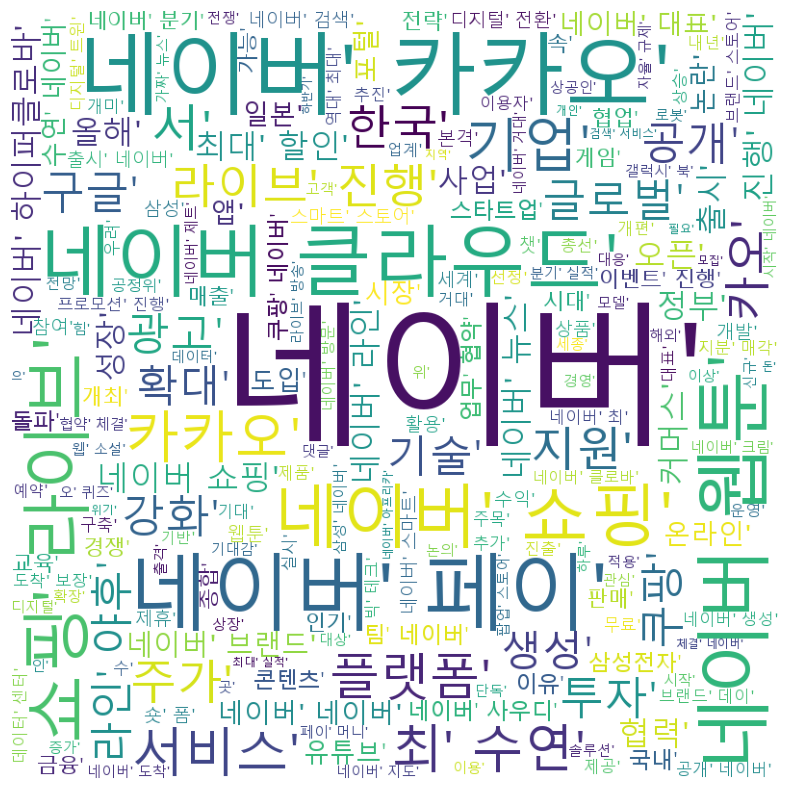

In [5]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=800, height=800)
my_cloud1 = cloud.generate_from_text(news_data)

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr1)
plt.axis('off')
plt.show()

# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [6]:
news

,Date,Title,ppc_Title,Tokens
0,2023-06-01,"네이버, 금지·혐오 표현 기준 개정…12일부터 정책 적용",네이버 금지 혐오 표현 기준 개정 12일부터 정책 적용,"['네이버', '금지', '혐오', '표현', '기준', '개정', '정책', '적용']"
1,2023-06-01,"네이버, 초거대 AI로 소상공인 라이브커머스 대본 작성 돕는 이유",네이버 초거대 AI로 소상공인 라이브커머스 대본 작성 돕는 이유,"['네이버', '거대', '상공인', '라이브', '커머스', '대본', '작성',..."
2,2023-06-01,네이버 악성 댓글땐 ‘악플러 꼬리표’ 단다,네이버 악성 댓글땐 악플러 꼬리표 단다,"['네이버', '악성', '댓글', '때', '악플', '꼬리표']"
3,2023-06-01,네이버가 4달간 중소상공인 브랜드 구축 돕는다,네이버가 4달간 중소상공인 브랜드 구축 돕는다,"['네이버', '중소', '상공인', '브랜드', '구축']"
4,2023-06-01,네이버·카카오 인물정보에 '장례지도사' 등 5개 직업 추가,네이버 카카오 인물정보에 장례지도사 등 5개 직업 추가,"['네이버', '카카오', '인물', '정보', '장례', '지도사', '직업', ..."
...,...,...,...,...
9316,2024-05-27,"티몬, 브랜드 단위 협업으로 직구 강화…""큐텐 시너지로 차별화""",티몬 브랜드 단위 협업으로 직구 강화 큐텐 시너지로 차별화,"['티몬', '브랜드', '단위', '협업', '직구', '강화', '큐', '텐'..."
9317,2024-05-27,"카카오·라인야후, 어떻게 해커에 뚫렸나… “오픈채팅방 ID 구조 단순”vs“...",카카오 라인야후 어떻게 해커에 뚫렸나 오픈채팅방 ID 구조 단순 VS,"['카카오', '라인', '야후', '해커', '오픈', '채팅방', '구조', '..."
9318,2024-05-27,네이버웹툰 ‘꿈에서 자유로’ 오는 6월 두 번째 오디오 웹툰 텀블럭 펀딩 실...,네이버웹툰 꿈에서 자유로 오는 6월 두 번째 오디오 웹툰 텀블럭 펀딩 실,"['네이버 웹툰', '꿈', '자유', '오디오', '웹툰', '텀', '블럭', ..."
9319,2024-05-27,“삼성 출신 들어가니 좀 달라졌네”…요즘 국회는 ‘AI 열공’,삼성 출신 들어가니 좀 달라졌네 요즘 국회는 AI 열공,"['삼성', '출신', '요즘', '국회']"


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from 

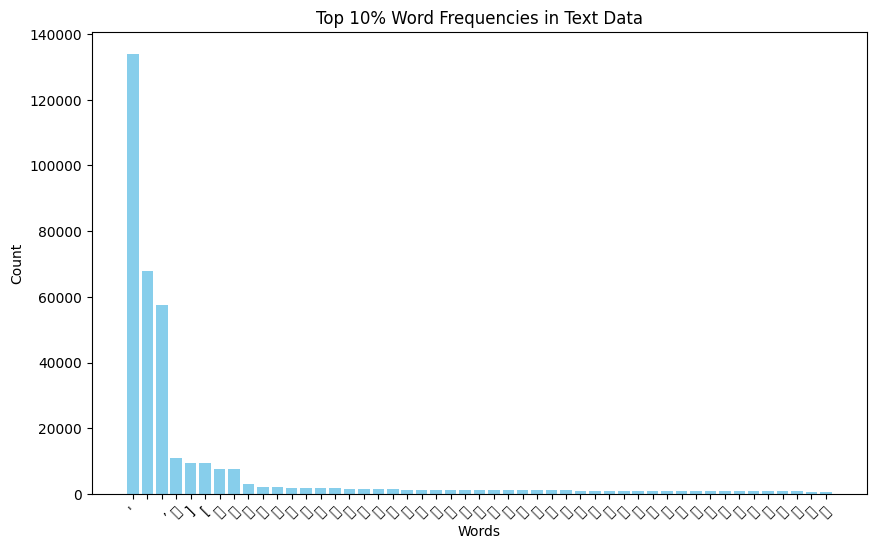

In [7]:
word_counts = Counter(news_data)

# 데이터프레임으로 변환
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# 빈도에 따라 내림차순으로 정렬
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# 상위 5% 단어 선택
top_10_percent_threshold = int(len(word_counts_df) * 0.05)
top_words_df = word_counts_df.head(top_10_percent_threshold)

# 빈도 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10% Word Frequencies in Text Data')
plt.xticks(rotation=45)
plt.show()

In [7]:
# 빈도수 기준으로 내림차순 정렬
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts


[("'", 133974),
 (' ', 67852),
 (',', 57668),
 ('이', 11040),
 ('[', 9321),
 (']', 9321),
 ('버', 7683),
 ('네', 7519),
 ('스', 3069),
 ('기', 2077),
 ('카', 2076),
 ('인', 1924),
 ('대', 1828),
 ('사', 1781),
 ('라', 1714),
 ('시', 1571),
 ('지', 1538),
 ('오', 1519),
 ('트', 1452),
 ('드', 1305),
 ('리', 1265),
 ('자', 1218),
 ('가', 1196),
 ('정', 1179),
 ('전', 1178),
 ('업', 1171),
 ('장', 1157),
 ('공', 1142),
 ('제', 1132),
 ('수', 1099),
 ('성', 1092),
 ('비', 1027),
 ('로', 1001),
 ('우', 1001),
 ('상', 999),
 ('주', 997),
 ('진', 936),
 ('서', 915),
 ('국', 869),
 ('클', 861),
 ('행', 847),
 ('페', 845),
 ('원', 838),
 ('개', 825),
 ('출', 818),
 ('브', 812),
 ('보', 800),
 ('구', 730),
 ('도', 728),
 ('신', 715),
 ('최', 679),
 ('디', 671),
 ('고', 667),
 ('마', 664),
 ('프', 663),
 ('위', 657),
 ('연', 656),
 ('웹', 650),
 ('크', 628),
 ('부', 627),
 ('유', 623),
 ('어', 622),
 ('소', 609),
 ('화', 608),
 ('세', 599),
 ('한', 593),
 ('일', 590),
 ('아', 589),
 ('툰', 587),
 ('동', 587),
 ('쇼', 565),
 ('선', 544),
 ('용', 533),
 ('하', 530),

In [ ]:
# 리스트 컴프리헨션을 사용하여 튜플의 첫 번째 요소만 추출
first_elements = [item[0] for item in sorted_word_counts if item[1] >= 10]

# 결과 출력
print(first_elements)

In [38]:
# 분석 결과
## AI가 많이 나옴 . 그러나 word_dict에 없다. 
## 하이퍼클로바X 가 많이 나옴 . 그러나 word_dict에 없다. 

## => 긍정 2점으로 매김 (word_dict 분포 근거로 판단)
print(news['Token'].str.contains('AI').sum())
news[news['Token'].str.contains('AI')]

1210


,Date,Title,Token,Sentiment_Word,Pos_Word,Neg_Word,Zero_Word,Score
1,2023-06-01,"네이버, 초거대 AI로 소상공인 라이브커머스 대본 작성 돕는 이유",네이버 초거대 AI 소상공인 라이브 커머스 대본 작성 돕 이유,"네이버, 초거대, 소상공인, 이유",초거대,소상공인,"네이버, AI, 라이브, 커머스, 대본, 작성, 돕, 이유",0
7,2023-06-01,"AI 웹툰 논란에 네이버·카카오 ""인간 작품만 받는다""",AI 웹툰 논란 네이버 카카오 인간 작품 받는다,"논란, 네이버, 카카오, 인간, 받는다",받는다,논란,"AI, 웹툰, 네이버, 카카오, 인간, 작품",0
23,2023-06-01,"[오늘의 증시 리포트] “네이버, AI와 로봇에 건 미래”",오늘 증시 리포트 네이버 AI 로봇 걸 미래,"오늘, 증시, 네이버, 미래",미래,NaN,"오늘, 증시, 리포트, 네이버, AI, 로봇, 걸",1
25,2023-06-01,"네이버 ""생성형 AI 도입돼도 검색 광고 수요 여전할 것""",네이버 생성형 AI 도입어도 검색 광고 수요 여전,"네이버, 광고, 수요, 여전",NaN,여전,"네이버, 생성형, AI, 도입어도, 검색, 광고, 수요",-1
32,2023-06-01,"글로벌 3대 AI학회 논문수, 삼성 17위-네이버 18위 머물러",글로벌 대 AI 학회 논문 수 삼성 위 네이버 위 머무르,"글로벌, 삼성, 네이버",NaN,NaN,"글로벌, 대, AI, 학회, 논문, 수, 삼성, 위, 네이버, 위, 머무르",0
...,...,...,...,...,...,...,...,...
9296,2024-05-24,"천재교육, 네이버클라우드와 AI 튜터 개발-도입 위해 MOU 체결",천재교육 네이버 클라우드 AI 튜터 개발 도입 위해 MOU 체결,"네이버, 클라우드, 개발, 도입, MOU, 체결","개발, 도입, MOU, 체결",NaN,"천재교육, 네이버, 클라우드, AI, 튜터, 위해",4
9300,2024-05-24,"[#IT라운지] 사우디 AI청장, 네이버1784 방문·카모빌 '커넥티드카·'톡플러스...",IT라운지 사우디 AI 청장 네이버 방 문 카 모빌 커넥티드카 톡 플러스,"네이버, 플러스",플러스,NaN,"IT라운지, 사우디, AI, 청장, 네이버, 방, 문, 카, 모빌, 커넥티드카, 톡",1
9329,2024-05-27,"네이버, 유엔 AI 자문기구 보고서 작성 참여…""기업·정부·학계 협력""",네이버 유엔 AI 자문 기구 보고서 작성 참여 기업 정부 학계 협력,"네이버, 참여, 기업, 정부, 협력","참여, 협력",NaN,"네이버, 유엔, AI, 자문, 기구, 보고서, 작성, 기업, 정부, 학계",2
9343,2024-05-27,“삼성 출신 들어가니 좀 달라졌네”…요즘 국회는 ‘AI 열공’,삼성 출신 들어가니 좀 달라지네 요즘 국회 AI 열공,"삼성, 열공",열공,NaN,"삼성, 출신, 들어가니, 좀, 달라지네, 요즘, 국회, AI",1


In [ ]:
# 분석 결과
## => AI, 하이퍼클로바 등 단어가 자주 등장하지만, 기존 감성 사전에는 존재하지 않음
# word_dict['AI']
# word_dict['하이퍼클로바']
## => AI, 하이퍼클로바 등은 긍정 요인으로 추가해야 할 듯

---

## (2) **[Zero + NaN]** WordCloud - "Zero_Word" 컬럼

In [15]:
zero_data = ''
for _, row in news.iterrows():
    if isinstance(row['Zero_Word'], str):  # Nan 인 경우 제외하고, 하나의 텍스트로 합치기 (오류 발생하므로)
        zero_data += row['Zero_Word'].replace(',', '') + ' '  # ','를 빈 문자열로 대체하고 단어 사이에 공백 추가
zero_data

'네이버 표현 기준 개정 정책 적용 네이버 상공인 라이브 커머스 대본 작성 이유 네이버 댓글 때 네이버 중소 상공인 브랜드 네이버 카카오 인물 정보 장례 지도사 직업 현대차 네이버 하이퍼클로바 시장 연착륙 상황 주연 네이버 공공 인프라 플랫폼 책임 웹툰 네이버 카카오 인간 작품 네이버 패션 플랫폼 브랜디 수혈 네이버 트위터 네이버 사용 실 검 김현철 국정 개입 의사 네이버 자료 파기 소년 판타지 네이버 나우 아베 방송 동시 중계 주치의 네이버 자료 발사체 경보 뒤 네이버 시민 가중 네이버 계열사 곳 임금 포털 위 네이버 뉴스 언론사 클릭 장사 네이버 페이 대출 금리 포인트 네이버 검색 순위 은 돈 검찰 네이버 판 로켓 배송 네이버 도착 맘 카페 발사체 네이버 모바일 접속 원총 네이버 뉴스 장사 뉴스 공정 얘기 때 트리니티 소프트 코드 레이 네이버 마켓 플레이스 등록 네이버 로봇 발사체 경보 뒤 네이버 네이버 생성 검색 광고 수요 서비스 네이버 카카오 먹거리 속 오 퀴즈 웨스트 네이버 쇼핑 라이브 정답 미래에셋증권 네이버 클라우드 빅데이터 페스티벌 경보 네이버 서버 단기 차입금 네이버 클라우드 하이퍼클로바 서울 디지털 재단 네이버 클라우드 업무 글로벌 학회 논문 수 삼성 네이버 산업부 하드웨어 첨단 전략 산업 총력 최 수연 네이버 대표 포함 경기 동부 상공인 기획전 장인 앞뜰 네이버 롯데 온 엔씨디지텍 네이버 스토어 갤럭시 북 특가 행사 서버 네이버 트래픽 대비책 당정 네이버 다음 독과점 연내 코스피 에너지 솔루션 네이버 주가 유니버스 클럽 쿠팡 네이버 멤버십 태평양 도서 네이버 방문 기술 국가 경쟁력 네이버 인물 정보 항목 다양 본인 서비스 모바일 통계청 네이버 방안 네이버 토스 대화 대출 플랫폼 국민 신한은행 까닭 네이버 회원 관리 카페 네이버 로그인 위자드 네이버 임직원 로컬 소통 한상혁 네이버 다음 손보기 관제 포털 시대 네이버 뷰티 해외직구 윈도 패션 타운 둥지 홈 미닉스 미니 건조기 네이버 쇼핑 론칭 임영웅 마리히 선 공개 네이버 최민호 시장 네이버 

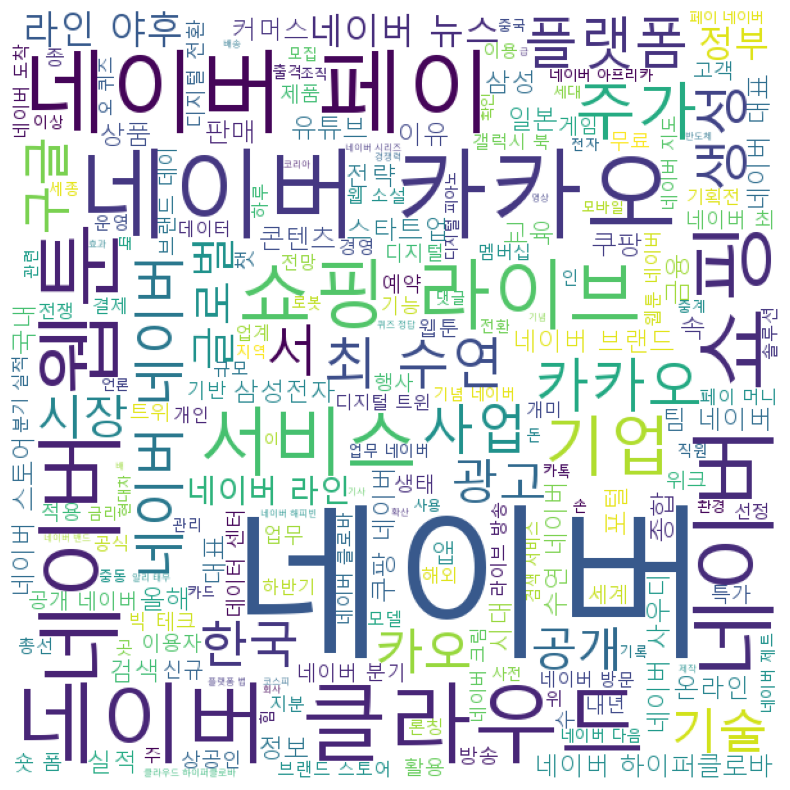

In [16]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=600, height=600)
my_cloud1 = cloud.generate_from_text(zero_data)

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr1)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

## (2) **[긍정]** WordCloud - "Pos_Word" 컬럼

In [9]:
news.head()

,Date,Title,Token,Sentiment_Word,Pos_Word,Neg_Word,Zero_Word,Score
0,2023-06-01,"네이버, 금지·혐오 표현 기준 개정…12일부터 정책 적용",네이버 금지 혐오 표현 기준 개정 정책 적용,"네이버, 금지, 혐오, 정책",NaN,"금지, 혐오","네이버, 표현, 기준, 개정, 정책, 적용",-3
1,2023-06-01,"네이버, 초거대 AI로 소상공인 라이브커머스 대본 작성 돕는 이유",네이버 초거대 AI 소상공인 라이브 커머스 대본 작성 돕 이유,"네이버, 초거대, 소상공인, 이유",초거대,소상공인,"네이버, AI, 라이브, 커머스, 대본, 작성, 돕, 이유",0
2,2023-06-01,네이버 악성 댓글땐 ‘악플러 꼬리표’ 단다,네이버 악성 댓글 악플러 꼬리표 달,"네이버, 악성, 댓글, 악플러, 꼬리표",NaN,"악성, 악플러, 꼬리표","네이버, 댓글, 달",-4
3,2023-06-01,네이버가 4달간 중소상공인 브랜드 구축 돕는다,네이버 달 간 중소 상공인 브랜드 구축 돕는다,"네이버, 구축, 돕는다","구축, 돕는다",NaN,"네이버, 달, 간, 중소, 상공인, 브랜드",2
4,2023-06-01,네이버·카카오 인물정보에 '장례지도사' 등 5개 직업 추가,네이버 카카오 인물 정보 장례 지도사 개 직업 추가,"네이버, 카카오, 정보, 추가",추가,NaN,"네이버, 카카오, 인물, 정보, 장례, 지도사, 개, 직업",1


In [10]:
pos_data = ''
for _, row in news.iterrows():
    if isinstance(row['Pos_Word'], str):  # Nan 인 경우 제외하고, 하나의 텍스트로 합치기 (오류 발생하므로)
        pos_data += row['Pos_Word'].replace(',', '') + ' '  # ','를 빈 문자열로 대체하고 단어 사이에 공백 추가
pos_data

'초거대 구축 돕는다 추가 받는다 투자 자금 복구 인상 개편 오픈 잘 보장 꿈틀 미래 개편 발굴 개최 확충 증가 기회 협약 체결 우수 프로모션 진행 집중 정상 정상 신세계 참여 확대 초거대 협업 모색 플러스 강화 기대감 예방 상장 양산 협약 혁신 앞장 구매 도입 보호 구축 지원 반등 진행 진행 신제품 출시 최대 할인 진화 단독 공략 점유율 지원 상생 확대 추월 초거대 구축 친환경 가능 점유율 투자 투자 네이버보다 참여 진행 할인 상생 용기 도전 가능 캠페인 실시 할인 이벤트 진행 도전 공세 추월 공세 인기 할인 최대 할인 공세 IPO 상장 단독 연재 영입 투자 검증 강화 영입 입지 벗 매수 수익 가능 점유율 확대 협력 진행 도입 오픈 친구 개최 초거대 출시 상생 지원 관심 미소 개발 인기 도전장 기대감 개최 최초 개편 투자 매출 인상 점유율 영입 이후 신세계 출범 돌파 영웅 인기 앞서 도전장 신세계 발전 협약 척척 충성 신세계 핵심 진행 인상 보장 최대 할인 지원 동맹 신세계 선점 이벤트 인상 보장 세일 오픈 확대 싣는다 오픈 순항 신세계 혜택 매출 최대 할인 보장 진행 세일 진행 세일 진행 강화 참여 할인 주목 입점 세일 상장 대상 할인 이벤트 실시 진행 협업 투자 관심 유치 협약 미학 이벤트 사랑 개선 추천 관심 신세계 본격 청신호 제대로 단독 핵심 개편 인재 양성 핵심 협력 초거대 이끌 구축 실시 개발 협력 가능 가능 강화 함께 인재 양성 함께 인재 양성 장기 특화 개발 박차 진행 신세계 단독 가능 강화 단독 투자 채택 강화 진격 단독 보호 보호 대상 진출 채택 진격 점유율 지원 개편 진행 투자 유치 투자 필수 성장세 인기 입점 점유율 확장 영웅 할인 진행 투자 확대 신설 슈퍼 진행 본격 신세계 스마트 기회 수익 사활 단독 영웅 돕는다 돕는다 투자 지원 지원 협약 채택 지원 최대 호응 성장 지원 최대 참여 최대 양성 이벤트 진행 프로모션 진행 출시 잘 복구 최대 할인 집중 스마트 진행 혜택 출시 시너지 메타버스 추가 투자 초대형 최대 공세 반격 개최 투자

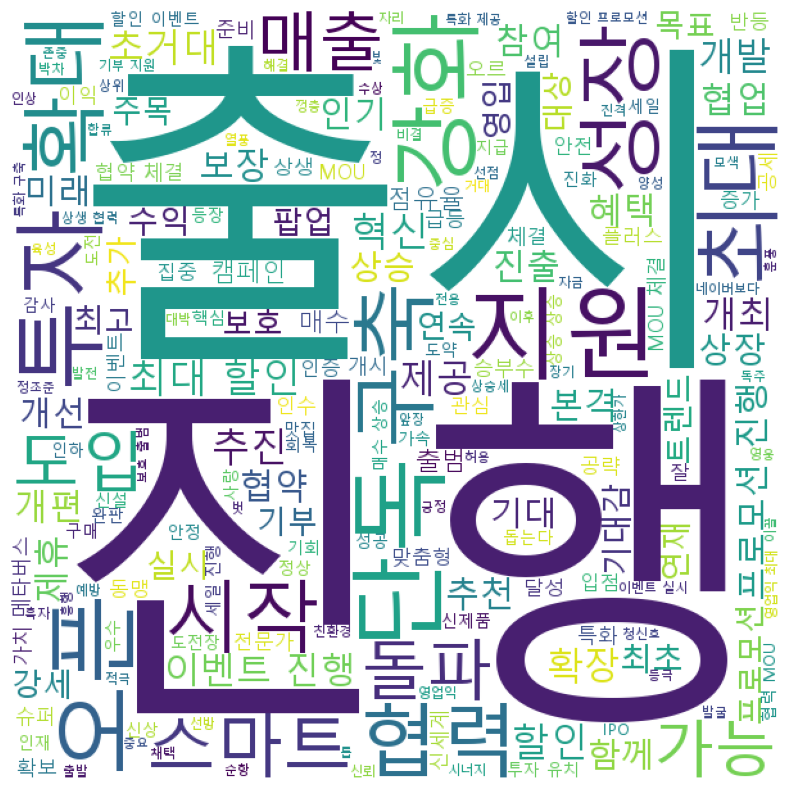

In [11]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=600, height=600)
my_cloud1 = cloud.generate_from_text(pos_data)

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr1)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [12]:
# 분석 결과
## 특별히 건드릴 거 없어 보임..?

## (3) **[부정]** WordCloud - "Neg_Word" 컬럼

In [31]:
word_dict['X']

-1

In [32]:
word_dict['XX']

KeyError: 'XX'

In [13]:
news.head(10)

,Date,Title,Token,Sentiment_Word,Pos_Word,Neg_Word,Zero_Word,Score
0,2023-06-01,"네이버, 금지·혐오 표현 기준 개정…12일부터 정책 적용",네이버 금지 혐오 표현 기준 개정 정책 적용,"네이버, 금지, 혐오, 정책",NaN,"금지, 혐오","네이버, 표현, 기준, 개정, 정책, 적용",-3
1,2023-06-01,"네이버, 초거대 AI로 소상공인 라이브커머스 대본 작성 돕는 이유",네이버 초거대 AI 소상공인 라이브 커머스 대본 작성 돕 이유,"네이버, 초거대, 소상공인, 이유",초거대,소상공인,"네이버, AI, 라이브, 커머스, 대본, 작성, 돕, 이유",0
2,2023-06-01,네이버 악성 댓글땐 ‘악플러 꼬리표’ 단다,네이버 악성 댓글 악플러 꼬리표 달,"네이버, 악성, 댓글, 악플러, 꼬리표",NaN,"악성, 악플러, 꼬리표","네이버, 댓글, 달",-4
3,2023-06-01,네이버가 4달간 중소상공인 브랜드 구축 돕는다,네이버 달 간 중소 상공인 브랜드 구축 돕는다,"네이버, 구축, 돕는다","구축, 돕는다",NaN,"네이버, 달, 간, 중소, 상공인, 브랜드",2
4,2023-06-01,네이버·카카오 인물정보에 '장례지도사' 등 5개 직업 추가,네이버 카카오 인물 정보 장례 지도사 개 직업 추가,"네이버, 카카오, 정보, 추가",추가,NaN,"네이버, 카카오, 인물, 정보, 장례, 지도사, 개, 직업",1
5,2023-06-01,"현대차證 “네이버, 하이퍼클로바X 시장 연착륙할 것”",현대차 네이버 하이퍼클로바 X 시장 연착륙,"현대차, 네이버, X, 시장",NaN,X,"현대차, 네이버, 하이퍼클로바, 시장, 연착륙",-1
6,2023-06-01,"재난상황 ‘주연’된 네이버...공공인프라 된 플랫폼, 책임 어디까지?",재난 상황 주연 네이버 공공 인프라 플랫폼 책임 어디,"재난, 상황, 네이버, 플랫폼, 어디",NaN,"재난, 어디","상황, 주연, 네이버, 공공, 인프라, 플랫폼, 책임",-3
7,2023-06-01,"AI 웹툰 논란에 네이버·카카오 ""인간 작품만 받는다""",AI 웹툰 논란 네이버 카카오 인간 작품 받는다,"논란, 네이버, 카카오, 인간, 받는다",받는다,논란,"AI, 웹툰, 네이버, 카카오, 인간, 작품",0
8,2023-06-01,네이버가 300억 투자한 패션 플랫폼 ‘브랜디’ 자금 수혈 필요,네이버 억 투자 패션 플랫폼 브랜디 자금 수혈 필요,"네이버, 투자, 플랫폼, 자금, 필요","투자, 자금",필요,"네이버, 억, 패션, 플랫폼, 브랜디, 수혈",1
9,2023-06-01,"네이버 마비, 5분 만에 복구됐지만… 실제 재난에선 어쩌나",네이버 마비 분 만 복구 실제 재난 어쩌나,"네이버, 마비, 복구, 재난",복구,"마비, 재난","네이버, 분, 만, 실제, 어쩌나",-2


In [35]:
neg_data = ''
for _, row in news.iterrows():
    if isinstance(row['Neg_Word'], str):  # Nan 인 경우 제외하고, 하나의 텍스트로 합치기 (오류 발생하므로)
        neg_data += row['Neg_Word'].replace(',', '') + ' '  # ','를 빈 문자열로 대체하고 단어 사이에 공백 추가
neg_data

'금지 혐오 소상공인 악성 악플러 꼬리표 X 재난 어디 논란 필요 마비 재난 폭로 고소 고소 무단 삭제 먹통 혼란 잠정 합의 격화 우려 조작 장애 겨냥 먹통 여전 재난 먹통 X 대응 소상공인 심각 비교 빠지 종료 금지 혐오 혐오 제재 거부 X X 혐오 삭제 비판 비공개 삭제 고소 의혹 폭로 고소 편 쓰레기 방치 어디 위기 문제 결국 급감 한숨 공정위 역차별 규제 논란 리스크 수수료 소상공인 논란 범람 조장 진심 화 흔들 막는다 위기 논의 환불 아직 베드 흔들 X 사태 규제 악플러 노출 과징금 우려 약세 악플러 노출 규제 환불 반발 하락 맞불 승부 승부 흔들 혐오 검열 여파 울상 치열 빈자리 우려 약세 악플 악플러 노출 불법 불황 무슨 X 유료 경쟁 논의 유출 폐지 의무 진짜 공정위 제재 논의 위법 공정위 철수 공정위 공정위 악용 갈등 맞불 항의 살얼음판 거지 환불 내우외환 위기 소상공인 증발 주춤 어쩌다 철수 적자 소상공인 유료 다툼 X 폭증 거짓 우려 공정위 오류 조사 가짜 해킹 피싱 적발 소상공인 짝퉁 교묘 피싱 피싱 해킹 피싱 피싱 적발 소상공인 소상공인 소상공인 소상공인 진짜 피싱 주의보 해킹 소상공인 피싱 해킹 먹통 사태 막는다 재난 피싱 소상공인 소상공인 해킹 X 오류 보이스피싱 먹잇감 급락 금지 여전 지연 사고 해킹 주의보 다운 중단 화 잰걸음 X 자해 비판 조심 해킹 악마 하한가 사태 제한 촉발 필요 적자 의존 공격 무더기 하한가 사태 압수 어렵 과점 소상공인 피해 주의보 장벽 X 모시 추락 불안감 부글부글 갈등 빠지 규제 꼴찌 블랙홀 실패 하한가 사태 황망 노심초사 사기 주의보 욕설 압도 아이 수수료 경고 제동 먹통 맞불 소상공인 혼잡 다운 규제 관건 해킹 종료 공석 멈추 긴장 절반 훼손 경고 미치 안간힘 빼앗기 수수료 금감원 불법 몰래 대응 힘든 경쟁 결국 악재 하락 매도 폭탄 하락 하락 마감 아이 장애 중단 하락 악재 후퇴 위기 매도 하락세 X 강제 의혹 독점 맞불 규제 역차별 소상공인 급락 독점 소송 빠지 하락 압박 비판 종료 유출 갈등 

In [29]:
# neg_data = ''
# for _, row in news.iterrows():
#     if isinstance(row['Neg_Word'], str):  # Nan 인 경우 제외하고, 하나의 텍스트로 합치기 (오류 발생하므로)
#         neg_data += row['Neg_Word']  # ','를 빈 문자열로 대체하고 단어 사이에 공백 추가
# neg_data

'금지, 혐오소상공인악성, 악플러, 꼬리표X재난, 어디논란필요마비, 재난폭로, 고소고소, 무단, 삭제먹통, 혼란잠정, 합의격화, 우려조작장애겨냥먹통여전재난, 먹통X대응소상공인심각비교빠지종료금지, 혐오혐오, 제재거부X, X, 혐오, 삭제비판비공개, 삭제, 고소의혹폭로, 고소편쓰레기, 방치어디위기문제결국급감한숨공정위, 역차별, 규제, 논란리스크수수료, 소상공인논란범람, 조장진심화흔들막는다위기논의환불, 아직베드흔들X사태규제악플러, 노출과징금우려, 약세악플러, 노출규제환불반발하락맞불승부승부흔들혐오, 검열여파, 울상치열빈자리우려, 약세악플, 악플러, 노출불법불황무슨X유료, 경쟁논의유출, 폐지의무진짜공정위, 제재논의위법공정위철수공정위공정위, 악용갈등맞불, 항의, 살얼음판거지, 환불내우외환위기소상공인증발주춤어쩌다철수, 적자소상공인유료다툼X폭증거짓, 우려, 공정위오류, 조사가짜, 해킹피싱, 적발소상공인짝퉁, 교묘, 피싱피싱, 해킹피싱피싱, 적발소상공인소상공인소상공인, 소상공인진짜, 피싱, 주의보해킹소상공인피싱, 해킹먹통, 사태, 막는다, 재난피싱소상공인, 소상공인해킹X오류보이스피싱, 먹잇감급락, 금지여전지연, 사고해킹, 주의보다운, 중단화, 잰걸음X자해, 비판조심, 해킹악마하한가, 사태, 제한, 촉발필요적자, 의존공격무더기, 하한가, 사태, 압수어렵, 과점소상공인피해, 주의보장벽X모시추락불안감부글부글갈등, 빠지규제꼴찌, 블랙홀, 실패하한가, 사태, 황망노심초사사기, 주의보욕설압도아이수수료경고, 제동먹통맞불소상공인혼잡, 다운규제관건해킹종료공석멈추긴장절반훼손, 경고미치안간힘빼앗기, 수수료금감원, 불법몰래대응힘든경쟁결국악재, 하락, 매도, 폭탄하락하락, 마감아이장애중단하락, 악재후퇴위기매도, 하락세X강제, 의혹독점, 맞불규제, 역차별소상공인급락, 독점, 소송빠지하락, 압박, 비판종료유출, 갈등하락눈물, 물타기그만차단매도매도주가조작, 금감원약점규제역대게이트대응독점, 걱정치매종료, 탓규제, 한숨변수역대보수, 보수마세요매각, 사채, 혼란반대논란불법X정리긴장빠지재판차별왕따, 속앓이재난추

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from

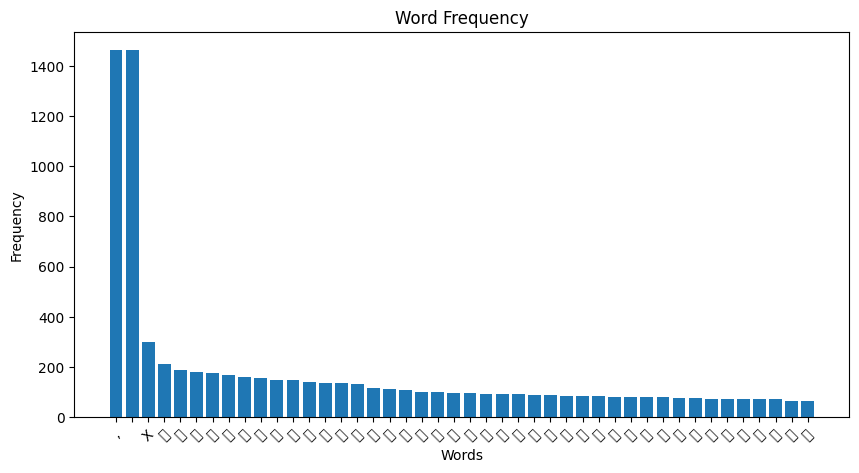

[(',', 1462),
 (' ', 1462),
 ('X', 298),
 ('사', 210),
 ('대', 188),
 ('감', 178),
 ('제', 177),
 ('조', 168),
 ('수', 159),
 ('공', 154),
 ('위', 148),
 ('의', 147),
 ('논', 141),
 ('비', 136),
 ('정', 134),
 ('가', 133),
 ('소', 118),
 ('지', 114),
 ('기', 109),
 ('불', 100),
 ('료', 99),
 ('락', 98),
 ('매', 96),
 ('태', 94),
 ('해', 92),
 ('경', 91),
 ('쟁', 90),
 ('란', 89),
 ('격', 84),
 ('상', 83),
 ('각', 83),
 ('규', 82),
 ('이', 81),
 ('고', 80),
 ('역', 79),
 ('하', 78),
 ('국', 76),
 ('리', 73),
 ('인', 72),
 ('요', 72),
 ('마', 72),
 ('부', 72),
 ('짜', 65),
 ('교', 64),
 ('반', 64),
 ('박', 64),
 ('금', 62),
 ('피', 62),
 ('무', 59),
 ('단', 59),
 ('압', 58),
 ('차', 57),
 ('아', 56),
 ('치', 55),
 ('출', 54),
 ('우', 53),
 ('려', 53),
 ('유', 53),
 ('한', 52),
 ('어', 51),
 ('작', 49),
 ('재', 48),
 ('진', 48),
 ('도', 48),
 ('노', 47),
 ('악', 46),
 ('장', 46),
 ('주', 46),
 ('발', 45),
 ('독', 44),
 ('절', 43),
 ('종', 42),
 ('혹', 42),
 ('중', 41),
 ('오', 40),
 ('평', 39),
 ('응', 38),
 ('필', 36),
 ('자', 36),
 ('추', 35),
 ('편', 34),
 ('보',

In [33]:
# Word frequency counter
word_counts = Counter(neg_data)
common_words = word_counts.most_common()
# 상위 30% 단어 추출
top_30_percent_count = int(len(common_words) * 0.1)
top_30_percent_words = common_words[:top_30_percent_count]

# Bar plot for word frequency
words, counts = zip(*top_30_percent_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45)
plt.show()

common_words

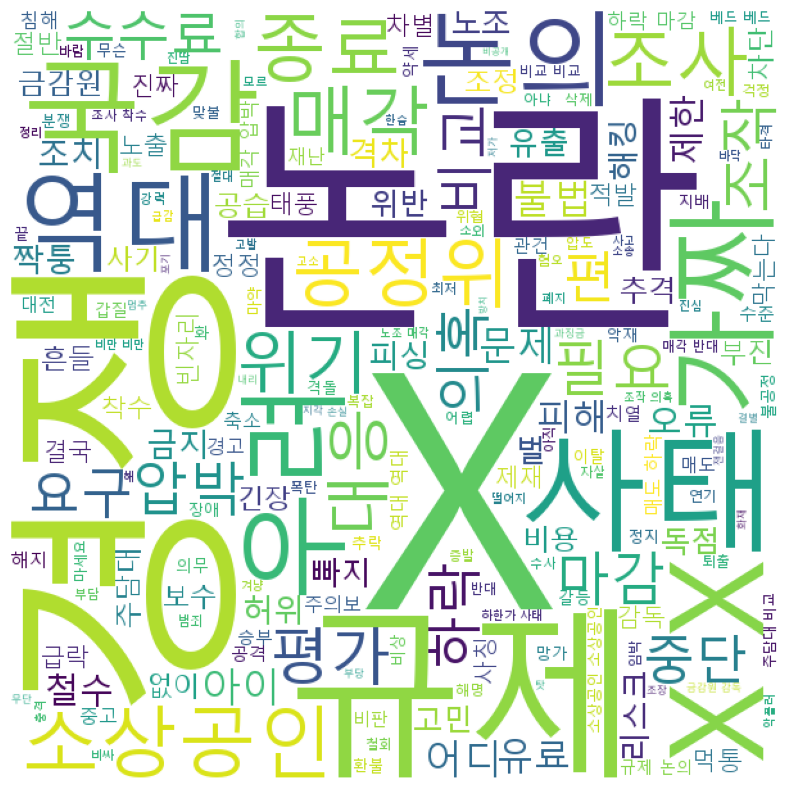

In [36]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=600, height=600)
my_cloud1 = cloud.generate_from_text(neg_data)

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr1)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [22]:
# 분석 결과
## => x가 하이클로바'x' 같음
## 확인해볼 것
print(news['Token'].str.contains('X|XX').sum())
news[news['Token'].str.contains('X|XX')]

380


,Date,Title,Token,Sentiment_Word,Pos_Word,Neg_Word,Zero_Word,Score
5,2023-06-01,"현대차證 “네이버, 하이퍼클로바X 시장 연착륙할 것”",현대차 네이버 하이퍼클로바 X 시장 연착륙,"현대차, 네이버, X, 시장",NaN,X,"현대차, 네이버, 하이퍼클로바, 시장, 연착륙",-1
30,2023-06-01,"'단기차입금' 증가한 네이버클라우드, 하이퍼클로바X로 기회 찾을까",단기 차입금 증가 네이버 클라우드 하이퍼클로바 X 기회 찾을까,"단기, 증가, 네이버, 클라우드, X, 기회","증가, 기회",X,"단기, 차입금, 네이버, 클라우드, 하이퍼클로바, 찾을까",1
59,2023-06-02,X쌍도·딸X…네이버에서 혐오표현 쓰면 ‘삭제’,X 쌍 딸 X 네이버 혐오 표현 쓰 삭제,"X, X, 네이버, 혐오, 삭제",NaN,"X, X, 혐오, 삭제","쌍, 딸, 네이버, 표현, 쓰",-5
149,2023-06-07,"아메리슬립, IPX와 라인프렌즈 스페셜 에디션 네이버 그린쇼핑위크에서 선봬",아 메리 슬립 IPX 라인 프렌즈 스페셜 에디션 네이버 그린 쇼핑 위크 선뵈,네이버,NaN,NaN,"아, 메리, 슬립, IPX, 라인, 프렌즈, 스페셜, 에디션, 네이버, 그린, 쇼핑...",0
151,2023-06-07,"'불후의 명곡' 이찬원, '울 엄마' 무대 네이버TV 1위X유튜브 인기급상승 2위 ...",불후 명곡 이찬원 울 엄마 무대 네이버 TV 위 X 유튜브 인기 급상승 위,"네이버, X, 유튜브, 인기",인기,X,"불후, 명곡, 이찬원, 울, 엄마, 무대, 네이버, TV, 위, 유튜브, 급상승, 위",0
...,...,...,...,...,...,...,...,...
8865,2024-05-08,"네이버 D2SF, 이미지 생성 AI 스타트업 ‘NXN Labs’에 신규 투자",네이버 D SF 이미지 생성 AI 스타트업 NXN LABS 신규 투자,"네이버, 신규, 투자",투자,NaN,"네이버, D, SF, 이미지, 생성, AI, 스타트업, NXN, LABS, 신규",1
8884,2024-05-08,"네이버 D2SF, 이미지 생성 AI 스타트업 'NXN Labs'에 신규 투자",네이버 D SF 이미지 생성 AI 스타트업 NXN LABS 신규 투자,"네이버, 신규, 투자",투자,NaN,"네이버, D, SF, 이미지, 생성, AI, 스타트업, NXN, LABS, 신규",1
8979,2024-05-13,"""하이퍼클로바X, 어떻게 활용할까""…네이버클라우드, 세미나 통해 '해법' 제시",하이퍼클로바 X 어떻 활용을까 네이버 클라우드 세미나 해법 제시,"X, 네이버, 클라우드, 해법",해법,X,"하이퍼클로바, 어떻, 활용을까, 네이버, 클라우드, 세미나, 제시",0
9051,2024-05-16,"웅진씽크빅, DX사업본부 신설해 글로벌 확장 가속",웅진씽크빅 DX 사업 본부 신설 글로벌 확장 가속,"사업, 신설, 글로벌, 확장, 가속","신설, 확장, 가속",NaN,"웅진씽크빅, DX, 사업, 본부, 글로벌",3


In [ ]:
# 확인 결과, 
## 클로바 X 로 쓰인 경우도 있지만,
## 'X'는 단순히 협업을 나타내는 기호로 쓰인 경우가 더 많음 ('콜라보레이션(Collaboration)' 또는 '협력'으로 해석)

In [23]:
word_dict['X']

-1

---

# 2. 자주 등장하는 단어 

In [25]:
# 상위 Score의 SentimentWord 확인
# 긍/부정 마다 확인
news_score = news.sort_values(by='Score', ascending=False)
display(news_score.head(10), news_score.tail(10))

,Date,Title,Token,Sentiment_Word,Pos_Word,Neg_Word,Zero_Word,Score
6018,2024-01-17,상생·협력 금융新상품 우수사례 및 '23년 상생·협력 증진 우수기관 시상식',상생 협력 금융 상품 우수 사례 및 상생 협력 증진 우수 기관 시상식,"상생, 협력, 금융, 우수, 상생, 협력, 우수, 기관","상생, 협력, 우수, 상생, 협력, 우수",NaN,"금융, 상품, 사례, 및, 증진, 기관, 시상식",8
1862,2023-08-08,황영웅 팬카페 회원 수 4만 1500명 돌파...네이버TV 상위권 올라,황 영웅 팬 카페 회원 수 돌파 네이버 TV 상위권 오르,"영웅, 카페, 돌파, 네이버, 상위권, 오르","영웅, 돌파, 상위권, 오르",NaN,"황, 팬, 카페, 회원, 수, 네이버, TV",7
3006,2023-09-20,"[단독] 네이버, 인도 진출 ‘청신호’…투자기업 8곳 가치 6조원 돌파",단독 네이버 인도 진출 청신호 투자 기업 곳 가치 조 돌파,"단독, 네이버, 진출, 청신호, 투자, 기업, 가치, 돌파","단독, 진출, 청신호, 투자, 가치, 돌파",NaN,"네이버, 인도, 기업, 곳, 조",7
6026,2024-01-17,SKT·네이버·카카오 ‘AI 안전성’ 확보 박차…“글로벌 AI 시장 진출 포석”,SKT 네이버 카카오 AI 안전 확보 박차 글로벌 AI 시장 진출 포석,"SKT, 네이버, 카카오, 안전, 확보, 박차, 글로벌, 시장, 진출, 포석","안전, 확보, 박차, 진출, 포석",NaN,"SKT, 네이버, 카카오, AI, 글로벌, AI, 시장",6
8253,2024-04-12,"네이버, 개미들 다시 '줍줍' 순매수 활기 주가 반등 기미",네이버 개미 다시 줍줍 순 매수 활기 주가 반등 기미,"네이버, 개미, 줍줍, 매수, 활기, 주가, 반등","줍줍, 매수, 활기, 반등",NaN,"네이버, 개미, 다시, 순, 주가, 기미",6
7619,2024-03-20,"[단독] GS25, 네이버플러스 회원 20% 할인…팝업 등 협력 강화",단독 GS 네이버 플러스 회원 할인 팝업 협력 강화,"단독, 네이버, 플러스, 할인, 팝업, 협력, 강화","단독, 플러스, 할인, 팝업, 협력, 강화",NaN,"GS, 네이버, 회원",6
2009,2023-08-14,"더함, 메탈 실버 냉장고 완판 기념 네이버 단독 최대 51% 할인 이벤트 진행",메탈 실버 냉장고 완판 기념 네이버 단독 최대 할인 이벤트 진행,"완판, 네이버, 단독, 최대, 할인, 이벤트, 진행","완판, 단독, 최대, 할인, 이벤트, 진행",NaN,"메탈, 실버, 냉장고, 기념, 네이버",6
2013,2023-08-14,"롯데렌탈, 친환경차 장기렌털 할인 프로모션..신규 고객 최대 40만원 할인",롯데 렌탈 친환경 차 장기 렌털 할인 프로모션 신규 고객 최대 할인,"친환경, 장기, 할인, 프로모션, 신규, 최대, 할인","친환경, 장기, 할인, 프로모션, 최대, 할인",NaN,"롯데, 렌탈, 차, 렌털, 신규, 고객",6
5213,2023-12-15,"“네이버, 내년 안정적 이익 성장…금리인하 환경 변화도 주목”",네이버 내년 안정 이익 성장 금리 인하 환경 변화 주목,"네이버, 내년, 안정, 이익, 성장, 금리, 인하, 주목","안정, 이익, 성장, 인하, 주목",NaN,"네이버, 내년, 금리, 환경, 변화",6
1094,2023-07-11,황영웅 '안 볼때 없을 때' 뜨거운 인기...네이버TV 상위권 올라,황 영웅 안 뜨겁 인기 네이버 TV 상위권 오르,"영웅, 인기, 네이버, 상위권, 오르","영웅, 인기, 상위권, 오르",NaN,"황, 안, 뜨겁, 네이버, TV",6


,Date,Title,Token,Sentiment_Word,Pos_Word,Neg_Word,Zero_Word,Score
3578,2023-10-17,"아이디어 도용 논란에 네·카 '진땀'...일각선 ""의혹만으로도 타격"" 우려",아이디어 도용 논란 네 카 진땀 일 각선 의혹 타격 우려,"논란, 진땀, 의혹, 타격, 우려",NaN,"논란, 진땀, 의혹, 타격, 우려","아이디어, 도용, 네, 카, 일, 각선",-5
2933,2023-09-18,네이버 ‘클로바X’ 기본적 교통-시사 답변 오류… 뉴스 무단 사용도 논란[인...,네이버 클로바 X 기본 교통 시사 답변 오류 뉴스 무단 사용 논란 인,"네이버, X, 기본, 오류, 뉴스, 무단, 논란",NaN,"X, 오류, 무단, 논란","네이버, 클로바, 기본, 교통, 시사, 답변, 뉴스, 사용, 인",-5
6047,2024-01-18,네이버 '치지직' 범죄·혐오 이력 스트리머 자격 박탈한다,네이버 치지직 범죄 혐오 이력 스트리머 자격 박탈,"네이버, 범죄, 혐오, 박탈",NaN,"범죄, 혐오, 박탈","네이버, 치지직, 이력, 스트리머, 자격",-5
8811,2024-05-07,"공정위, 네이버·쿠팡 현장조사…'중도해지 미환불' 의혹",공정위 네이버 쿠팡 현장 조사 중도 해지 미 환불 의혹,"공정위, 네이버, 쿠팡, 조사, 해지, 환불, 의혹",NaN,"공정위, 조사, 해지, 환불, 의혹","네이버, 쿠팡, 현장, 중도, 미",-5
4157,2023-11-07,‘독점→차별’ 시장 지배하는 ‘빅테크 공룡’에 법원 “규제 필요성”,독점 차별 시장 지배 빅 테크 공룡 법원 규제 필요,"독점, 차별, 시장, 지배, 테크, 규제, 필요",NaN,"독점, 차별, 지배, 규제, 필요","시장, 빅, 테크, 공룡, 법원",-6
1284,2023-07-18,"네이버 카페, 임시 점검 후 기능 먹통·오류 발생…이용자들 불편 호소",네이버 카페 임시 점검 후 기능 먹통 오류 발생 이용자 불편 호소,"네이버, 카페, 먹통, 오류, 발생, 불편, 호소",NaN,"먹통, 오류, 불편, 호소","네이버, 카페, 임시, 점검, 후, 기능, 발생, 이용자",-6
4558,2023-11-21,'세금납부 안내' 잘못 누르면 '가짜 네이버' 연결…北해킹 주의보,세금 납부 안내 잘못 누르 가짜 네이버 연결 해킹 주의보,"세금, 잘못, 가짜, 네이버, 해킹, 주의보",NaN,"세금, 잘못, 가짜, 해킹, 주의보","납부, 안내, 누르, 네이버, 연결",-6
8855,2024-05-08,"공정위 조사에 네카오 '긴장'…네이버 구독해지, 카카오는 중개수수료 의혹",공정위 조사 네카오 긴장 네이버 구독 해지 카카오 중개 수수료 의혹,"공정위, 조사, 네카오, 긴장, 네이버, 구독, 해지, 카카오, 수수료, 의혹",NaN,"공정위, 조사, 긴장, 해지, 수수료, 의혹","네카오, 네이버, 구독, 카카오, 중개",-6
5397,2023-12-21,"카카오·네이버·구글 규제법 제정에 IT업계 ""시장 고사 우려…손해는 결국 소...",카카오 네이버 구글 규제 법 제정 IT 업계 시장 고사 우려 손해 결국 소,"카카오, 네이버, 구글, 규제, 시장, 우려, 손해, 결국",NaN,"규제, 우려, 손해, 결국","카카오, 네이버, 구글, 법, 제정, IT, 업계, 시장, 고사, 소",-6
3128,2023-09-25,"방통위 ""네이버 뉴스서비스 금지행위 위반 조사""…과징금·형사고발 병행",방통위 네이버 뉴스 서비스 금지 행위 위반 조사 과징금 형사 고발 병행,"네이버, 뉴스, 서비스, 금지, 위반, 조사, 과징금, 형사, 고발",NaN,"금지, 위반, 조사, 과징금, 형사, 고발","방통위, 네이버, 뉴스, 서비스, 행위, 병행",-6


In [26]:
# 아직 긍/부정 태깅 안 된 단어 확인
score_zero = news[news['Zero_Word']==0]
score_zero

,Date,Title,Token,Sentiment_Word,Pos_Word,Neg_Word,Zero_Word,Score


In [15]:
score_zero_word = score_zero.groupby('Date').agg({'Token': 'sum', 'SentimentWord': 'sum'}).rename(columns={'Token': 'Token_Sum', 'SentimentWord': 'SentimentWord_Sum'}).reset_index()
score_zero_word

,Date,Token_Sum,SentimentWord_Sum
0,2023-06-01,네이버 초거대 AI 소상공인 라이브 커머스 대본 작성 돕 이유AI 웹툰 논란 네이버...,"초거대, 소상공인논란, 받는다신세계, 비교"
1,2023-06-02,태평양 도서 개국 네이버 방 문 IT 기술력 국가 경쟁력잇속 SKT KT...,"편, 진화"
2,2023-06-05,떨 니 카카오톡 네이버 제치 유튜브 추월 위기사우디 손 잡 네이버 국가 ICT 수출...,"추월, 위기결국, 가능점유율, 급감한숨, 투자수수료, 할인, 소상공인, 상생논란, 도전"
3,2023-06-07,네이버 강점 커머스 분야 플랫폼 최선호 aT 네이버 쇼핑 라이브 풀럼 코트 신품종...,"입지, 흔들협력, 논의X, 인기"
4,2023-06-08,네이버 커넥트 재단 소프트웨어 에듀 리뷰 발간네이버 카카오 매출 과징금 때리나...,"매출, 과징금점유율, 하락충성, 승부선점, 치열"
...,...,...,...
236,2024-05-21,네이버 라인 야후 지분 관계 미셸 더넬란 과학 기술부 장관 네이버 방 문...,"폭탄, 진행유료, 출시"
237,2024-05-22,네이버 이해진 왜 조지 오웰 소설 꺼내나네이버 울산시청 정보 한눈라인 야후...,"플러스, 분할단독, 합류, 사태, 우려단독, 갈등플러스, 어렵"
238,2024-05-23,매출 증가 는데 라인 야후 사태 네이버 매출 타격 불가피우대 빵 부동산 네이버 ...,"매출, 증가, 사태, 매출, 타격, 불가피오류, 인기, 견인"
239,2024-05-24,AI 명소 네이버 사옥 중동 발길 끊이 이유사우디 데이터 AI 청장 네이버 사옥 찾...,"강탈, 전문가, 적극압박, 통과통과, 압박폭발, 도전장"


In [ ]:
# 감성사전 불러오기
word_dict_df = pd.read_csv("단어합본.csv")
word_dict_df = word_dict_df.drop(columns=['Unnamed: 0'])
word_dict = word_dict_df.set_index('word').to_dict()['polarity']

In [ ]:
polarity_counts = word_dict_df['polarity'].value_counts().sort_index()

# 감성사전 점수 분포 시각화
plt.figure(figsize=(8, 4))
polarity_counts.plot(kind='bar')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Polarity')
plt.show()/

In [ ]:
from collections import Counter
word_freq = Counter(words)
